In [164]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

# Context

In [165]:
train_data=pd.read_csv('train.csv', index_col='PassengerId')
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [166]:
train_data.shape

(100000, 11)

In [167]:
pd.isna(train_data).sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

We see that 67866 entries out of 100000 in 'Cabin' column have NaN values, so we can drop the whole column since it does not bring any useful information.

In [168]:
train_data=train_data.drop('Cabin', axis=1)

# Data exploration

### Relation between survival and sex

In [169]:
train_data.groupby('Survived').Survived.count()

Survived
0    57226
1    42774
Name: Survived, dtype: int64

42774 people survived and 57226 people did not.

In [170]:
train_data.groupby('Sex').Sex.count()

Sex
female    43886
male      56114
Name: Sex, dtype: int64

There were 43886 female and 56114 male people. Theses numbers are relatively equal.

In [171]:
train_data.groupby(['Survived', 'Sex']).Survived.count()

Survived  Sex   
0         female    12660
          male      44566
1         female    31226
          male      11548
Name: Survived, dtype: int64

It can be seen that the number of survived women(31226) is considerably bigger than the number of survived men(11548). Conversely, the number of not survived women(12660) is less than the number of not survived men(44566). More women have survived than men. 

### Distribution of the number of siblings and spouses

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

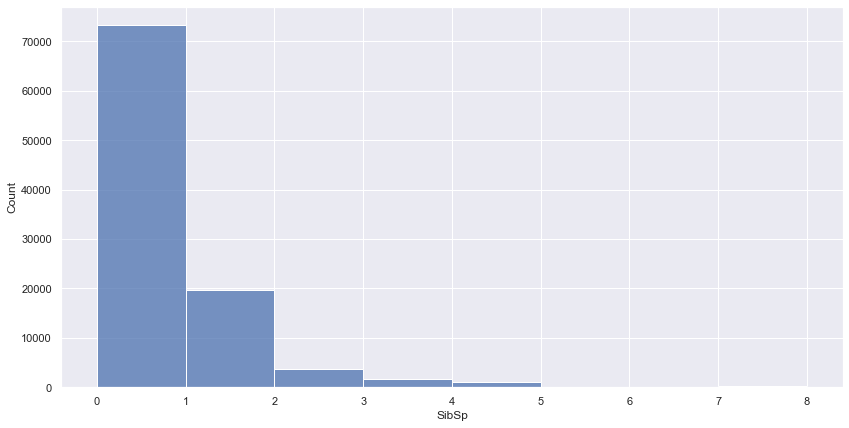

In [172]:
plt.figure(figsize=(14, 7))
sns.histplot(data=train_data, x='SibSp', binwidth=1)

The histogram showing the distribution of the number of passengers' siblings and spouses abroad can be seen above. The distribution looks like geometric distribution, and the density of passengers decreases as the number of siblings and spouses increases.

### Distribution of the fare value

In [173]:
#train_data=train_data.dropna()
train_data['Fare'].describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

Mean fare is 45.5, minimum fare is 0.68 and maximum fare is 744.66.

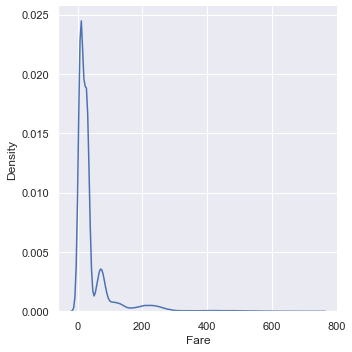

In [174]:
sns.displot(train_data, x='Fare', kind='kde')

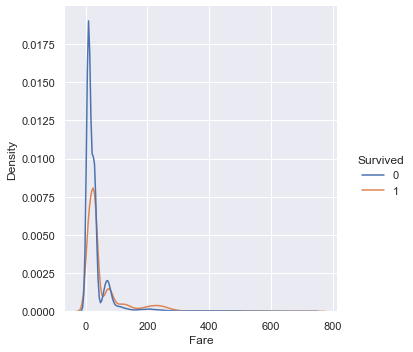

In [175]:
sns.displot(train_data, x='Fare', hue='Survived', kind='kde')

Distributions of the fare of all passengers, survived passengers and not survived passengers looks very similar. However, density of people with low fare are considerably lower among survived people. It can be assumed that people with low fare had lower chances to survive.

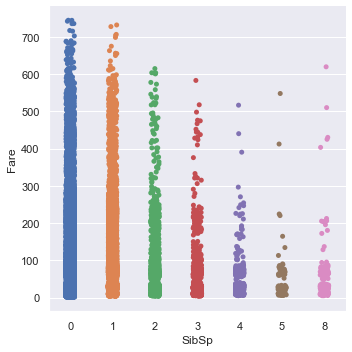

In [176]:
sns.catplot(x='SibSp', y='Fare', data=train_data)

From the plot above, it can be seen that the passenger fare dicreases as the number of siblings ans spouses abroad increases.

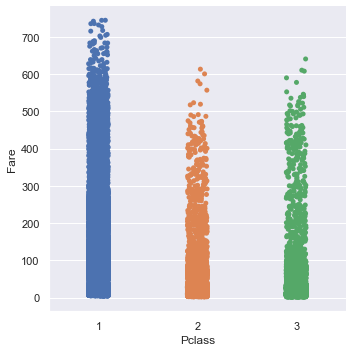

In [177]:
sns.catplot(x='Pclass', y='Fare', data=train_data)

 From the plot above, it can be seen that people in upper class had more fare than those from meduim and low. However there are little difference between people from medium and low class in their fare.

### Relation between sex and passenger's class

In [178]:
train_data['is_female'] = (train_data['Sex'] == 'female')
sex_data=train_data.groupby('Pclass').is_female.agg(['count', 'sum'])
sex_data['Female_ratio'] = sex_data['sum'] / sex_data['count']
sex_data

,count,sum,Female_ratio
Pclass,,,
1,30315,16084,0.530562
2,28679,15283,0.532899
3,41006,12519,0.305297


Upper and medium classes had relatively equal distribution of female and male passengers. However, in lower class, there are considerably less female passengers(30%).

### Relation between survival and passenger's class

In [179]:
class_data=train_data.groupby('Pclass').Survived.agg(['count', 'sum'])
class_data['Survived_ratio'] = class_data['sum'] / class_data['count']
class_data

,count,sum,Survived_ratio
Pclass,,,
1,30315,17576,0.579779
2,28679,15057,0.525018
3,41006,10141,0.247305


From the table below, it can be seen that the people from higher classes had higher chances to survive. 58% of people from the upper class, 53% of people from the medium class, and only 25% percent of people from the lower class have survived. However, the low rate of survival among people in the lower class can be explained by the fact that most of the people in the lower class were male passengers.

### Relation between sex and embarkation port

In [180]:
embarked_data=train_data.groupby('Embarked').is_female.agg(['count', 'sum'])
embarked_data['Female_ratio'] = embarked_data['sum'] / embarked_data['count']
embarked_data

,count,sum,Female_ratio
Embarked,,,
C,22187,15786,0.711498
Q,5424,3852,0.710177
S,72139,24117,0.334313


Passengers embarked from port 'C' and 'Q' were mostly female, and passengers from port 'S' were mostly male.

### Relation between survival and embarkation port

In [181]:
embarked_survival_data=train_data.groupby('Embarked').Survived.agg(['count', 'sum'])
embarked_survival_data['survival_ratio'] = embarked_survival_data['sum'] / embarked_survival_data['count']
embarked_survival_data

,count,sum,survival_ratio
Embarked,,,
C,22187,16669,0.751296
Q,5424,3238,0.596976
S,72139,22745,0.315294


The survival ratio of embarkation ports 'C' and 'S' corresponds with the ratio of female passengers, and can be explained by this ratio. However, the survival ratio of port 'Q' is considerably smaller than that of port 'C', even though they have an equal ratio of female passengers.

### Class and Embarkation port

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

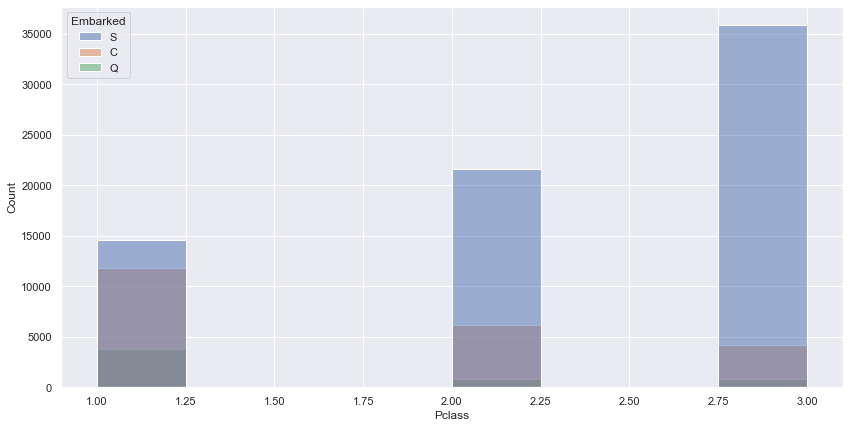

In [237]:
plt.figure(figsize=(14, 7))
sns.histplot(data=train_data, x='Pclass', hue='Embarked', binwidth = 0.25)

It can be seen that most of the peope in medium and lower class were from port 'S'. Most of the people from port 'Q' were in upper class, and a small number of people from port 'S' were in upper class.

### Distribution of age

In [186]:
train_data['Age'].describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

Mean age was 38, maximum age was 87 and minimum age was 0.

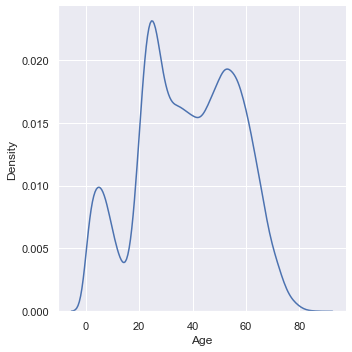

In [182]:
sns.displot(train_data, x='Age', kind='kde')

Most of the people were in the age from 20 to 30 and from 50 to 60. The number of people in the ages of 35-45 is smaller.

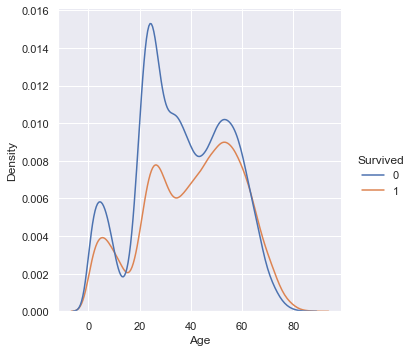

In [183]:
sns.displot(train_data, x='Age', hue='Survived', kind='kde')

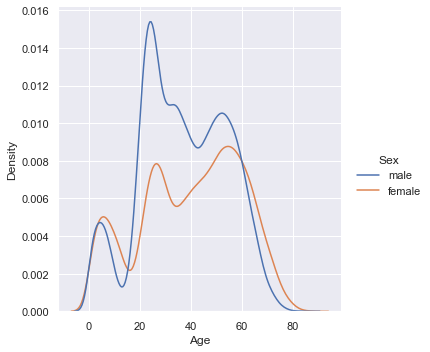

In [184]:
sns.displot(train_data, x='Age', hue='Sex', kind='kde')

There was a smaller number of female people in the age of 20-40 than the male. Similarly, the number of surviving people in the age of 20-40 was also smaller. It is related to the correlation between sex and survival.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

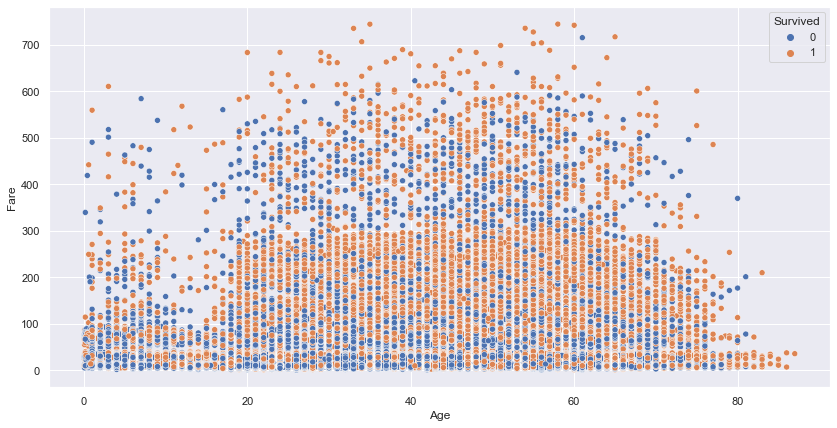

In [188]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=train_data['Age'], y=train_data['Fare'], hue=train_data['Survived'])

There are no correlation between age and fare

### Relation between survival and age

In [196]:
train_data_age=train_data
train_data_age=train_data_age.dropna()
train_data_age=train_data_age.astype({'Age' : 'int32'})
train_data_age=train_data_age.groupby('Age').Survived.agg(['count', 'sum'])
train_data_age['survival_ratio']=train_data_age['sum']/train_data_age['count']
train_data_age

,count,sum,survival_ratio
Age,,,
0,636,226,0.355346
1,642,245,0.381620
2,874,340,0.389016
3,914,362,0.396061
4,992,365,0.367944
...,...,...,...
83,9,7,0.777778
84,3,3,1.000000
85,3,3,1.000000


<AxesSubplot:xlabel='Age', ylabel='survival_ratio'>

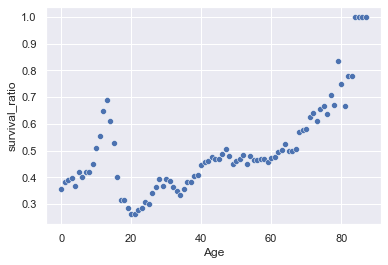

In [197]:
sns.scatterplot(x=train_data_age.index, y=train_data_age['survival_ratio'])

In [203]:
r_coef=np.corrcoef(train_data_age.index, train_data_age['survival_ratio'])[0][1]
r_coef

0.7042275406997704

We can see a strong positive correlation(r = 0.70) between age and survival. However, groups of people under 13, between 13 and 20, and above 20 differs for their survival ration tendencies.

In [209]:
age_under13=train_data_age[train_data_age.index <= 13]
age_13to20=train_data_age[(train_data_age.index > 13) & (train_data_age.index < 20)]
age_above20=train_data_age[train_data_age.index >= 20]

<AxesSubplot:xlabel='Age', ylabel='survival_ratio'>

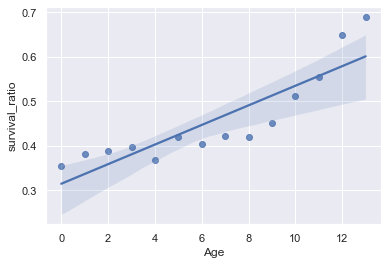

In [210]:
sns.regplot(x=age_under13.index, y=age_under13['survival_ratio'])

In [211]:
r_coef13=np.corrcoef(age_under13.index, age_under13['survival_ratio'])[0][1]
r_coef13

0.8781373456579419

For children in the age from 0 to 13, there are strong positive correlation(r = 0.88) between age and survival)

<AxesSubplot:xlabel='Age', ylabel='survival_ratio'>

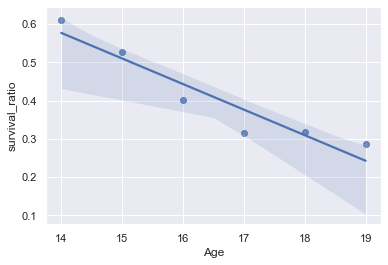

In [212]:
sns.regplot(x=age_13to20.index, y=age_13to20['survival_ratio'])

In [213]:
r_coef13to20=np.corrcoef(age_13to20.index, age_13to20['survival_ratio'])[0][1]
r_coef13to20

-0.9477867535918463

For teenager in the age from 13 to 20, there are strong negative correlation(r = -0.95) between age and survival.

<AxesSubplot:xlabel='Age', ylabel='survival_ratio'>

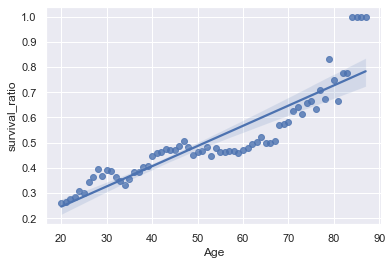

In [214]:
sns.regplot(x=age_above20.index, y=age_above20['survival_ratio'])

In [215]:
r_coef20=np.corrcoef(age_above20.index, age_above20['survival_ratio'])[0][1]
r_coef20

0.8971607067740074

For adults in the age above 20, there are strong positive correlation(r = 0.90) between age and survival.

### Number of relatives and relations

In [218]:
train_data['relatives']=train_data['SibSp']+train_data['Parch']
train_data['relatives'].describe()

count    100000.000000
mean          0.852250
std           1.412792
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          17.000000
Name: relatives, dtype: float64

Mean number of relatives is 0.85, max is 17 and min is 0.

In [220]:
relatives_data=train_data.groupby('relatives').Survived.agg(['count', 'sum'])
relatives_data['survival_ratio']=relatives_data['sum']/relatives_data['count']
relatives_data

,count,sum,survival_ratio
relatives,,,
0,61853,25013,0.404394
1,14212,7337,0.516254
2,10789,5205,0.482436
3,8810,3605,0.409194
4,1870,627,0.335294
5,1274,561,0.440345
6,498,162,0.325301
7,104,28,0.269231
8,111,28,0.252252


<AxesSubplot:xlabel='relatives', ylabel='survival_ratio'>

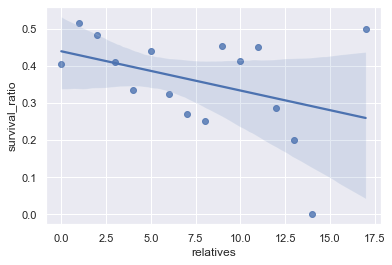

In [222]:
sns.regplot(x=relatives_data.index, y=relatives_data['survival_ratio'])

In [223]:
r_relatives=np.corrcoef(relatives_data.index, relatives_data['survival_ratio'])[0][1]
r_relatives

-0.3916681900069053

There are medium negative correlation(r = -0.40) between the number of relatives and survival.

# Summary

There are strong relation between sex and survival: more women survived than men. Th number of men and women passengers are relatively equal. Also, there strong correlations between age and survival in different age groups. Children in age 0-13 and adults in age above 20 have a positive correlation. Teenagers in the age 13-20 have negative correlation. Also, there are medium positive correlation between the number of relatives(sum of the number of parents, siblings and spouses abroad) and survival. There were no correlation between age and fare. People from upper class had more fare, even though those from medium and lower class had similar fare. The number of female and male passengers in upper and medium classes were almost the same, and the number of male passenger in lower class was bigger than the number of female passengers.